# Visão Computacional Detalhada das Redes Neurais Convolucionais

In [1]:
from sklearn.datasets import load_sample_image

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Model, Sequential

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist

c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

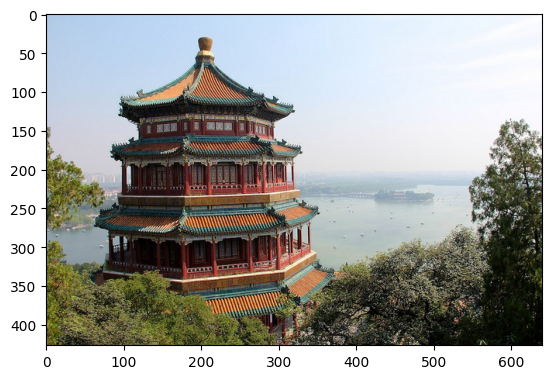

In [10]:
plt.imshow(china);

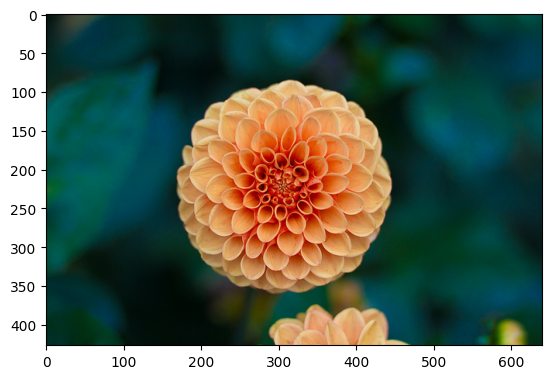

In [12]:
plt.imshow(flower);

In [14]:
china.shape, flower.shape

((427, 640, 3), (427, 640, 3))

In [16]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [17]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

In [19]:
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

In [22]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

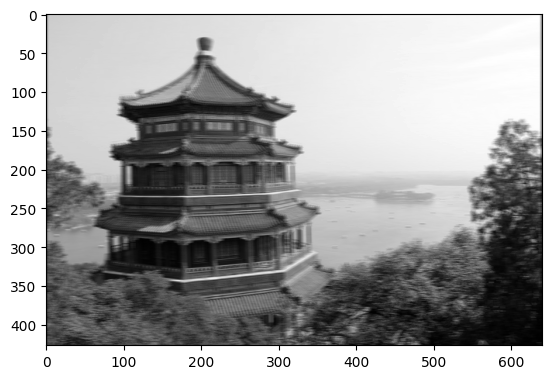

In [25]:
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

In [27]:
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3),
                        padding="VALID")

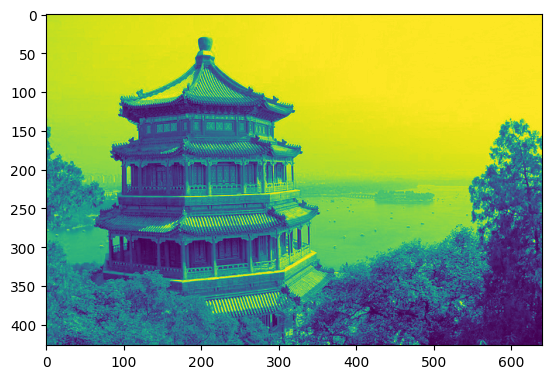

In [30]:
plt.imshow(output[0])

## Arquiteturas das CNNs

In [32]:
model = Sequential()
model.add(Conv2D(64, 7, activation="relu", padding="SAME", input_shape=[28, 28, 1]))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, activation="relu", padding="SAME"))
model.add(Conv2D(128, 3, activation="relu", padding="SAME"))
model.add(MaxPool2D(2))
model.add(Conv2D(256, 3, activation="relu", padding="SAME"))
model.add(Conv2D(256, 3, activation="relu", padding="SAME"))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [45]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [46]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10



1875/1875 [==============================] - 180s 94ms/step - loss: 0.9220 - accuracy: 0.7119 - val_loss: 0.1550 - val_accuracy: 0.9668
Epoch 2/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2326 - accuracy: 0.9451 - val_loss: 0.0749 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 168s 90ms/step - loss: 0.1682 - accuracy: 0.9628 - val_loss: 0.0734 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1456 - accuracy: 0.9680 - val_loss: 0.0789 - val_accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1369 - accuracy: 0.9696 - val_loss: 0.0829 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1189 - accuracy: 0.9736 - val_loss: 0.0665 - val_accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1254 - accuracy: 0.9736 - val_loss: 0.0710 - val

<Axes: >

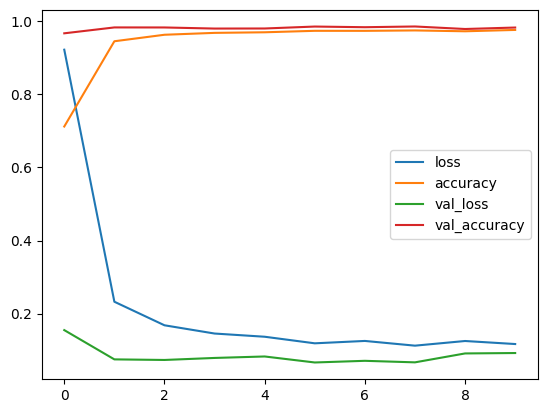

In [47]:
pd.DataFrame(history.history).plot()

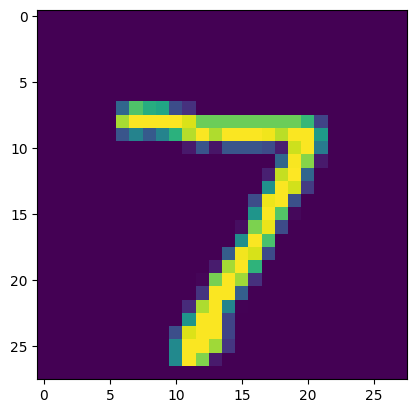

In [48]:
plt.imshow(x_test[0]);

In [52]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 30ms/step - loss: 0.0923 - accuracy: 0.9826


[0.09230326116085052, 0.9825999736785889]

In [54]:
pred = model.predict(x_test)

313/313 [==============================] - 11s 34ms/step


In [55]:
from sklearn.metrics import accuracy_score

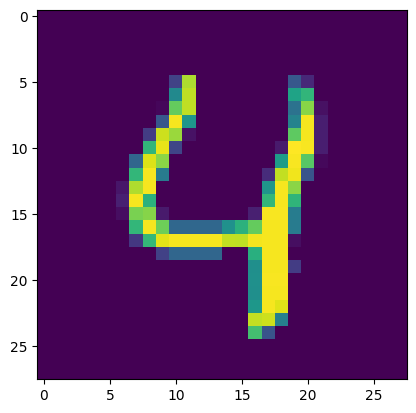

In [59]:
plt.imshow(x_test[4])

In [ ]:
np.argmax(model.predict(np.expand_dims(x_test[4], axis=0)))

1/1 [==============================] - 0s 28ms/step


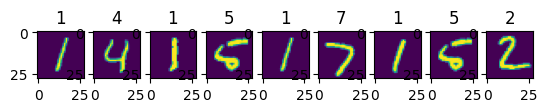

In [114]:
count = 0
fig, aux = plt.subplots(1, 9)
for i in range(10):
    
    if count == 9:
        break
    num = np.random.randint(20)
    aux[count]
    aux[count].imshow(x_test[num])
    aux[count].set_title(np.argmax(model.predict(np.expand_dims(x_test[num], axis=0))))
    count += 1

plt.plot();

## LeNet-5, Restnet, Googlenet, SE net

### Implementando uma CNN RestNet-34 usando a Keras

In [12]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Activation, GlobalAvgPool2D

In [8]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding="SAME", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding="SAME", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding="SAME", use_bias=False),
                keras.layers.BatchNormalization()]
    
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [21]:
model = Sequential()
model.add(Conv2D(64, 7, strides=2, input_shape=[28, 28, 1], padding="SAME", use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(GlobalAvgPool2D())
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [22]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [23]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


1875/1875 [==============================] - 970s 510ms/step - loss: 0.1827 - accuracy: 0.9492 - val_loss: 0.2147 - val_accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 1003s 535ms/step - loss: 0.0819 - accuracy: 0.9765 - val_loss: 0.5687 - val_accuracy: 0.8583
Epoch 3/5
1875/1875 [==============================] - 998s 532ms/step - loss: 0.0667 - accuracy: 0.9813 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 1127s 601ms/step - loss: 0.0731 - accuracy: 0.9807 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 1126s 601ms/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.0430 - val_accuracy: 0.9873


<Axes: >

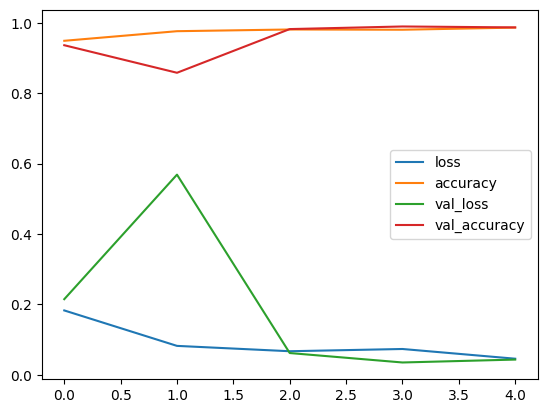

In [24]:
pd.DataFrame(history.history).plot()

1/1 [==============================] - 0s 53ms/step


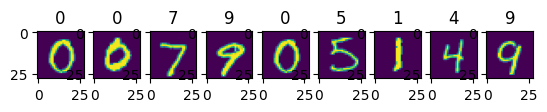

In [26]:
count = 0
fig, aux = plt.subplots(1, 9)
for i in range(10):
    
    if count == 9:
        break
    num = np.random.randint(20)
    aux[count]
    aux[count].imshow(x_test[num])
    aux[count].set_title(np.argmax(model.predict(np.expand_dims(x_test[num], axis=0))))
    count += 1

plt.plot();

In [27]:
keras.models.save_model(model, "models/restnet.h5")

C:\Users\franc\AppData\Local\Temp\ipykernel_4336\2760022862.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, "models/restnet.h5")


In [28]:
model.save_weights("models/weights/resnet_weights.h5")

In [29]:
x_train.shape

(60000, 28, 28)